In [1]:
import pandas as pd
import numpy as np

In [17]:
## swat data
hru = pd.read_csv('hru.csv')
subbasins = list(pd.read_csv('MAR_wells_2.csv').iloc[:,3].values)
hru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481248 entries, 0 to 481247
Data columns (total 84 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   LULC         481248 non-null  object 
 1   HRU          481248 non-null  int64  
 2   HRUGIS       481248 non-null  int64  
 3   SUB          481248 non-null  int64  
 4   YEAR         481248 non-null  int64  
 5   MON          481248 non-null  int64  
 6   AREAkm2      481248 non-null  float64
 7   PRECIPmm     481248 non-null  float64
 8   SNOWFALLmm   481248 non-null  int64  
 9   SNOWMELTmm   481248 non-null  int64  
 10  IRRmm        481248 non-null  int64  
 11  PETmm        481248 non-null  float64
 12  ETmm         481248 non-null  float64
 13  SW_INITmm    481248 non-null  float64
 14  SW_ENDmm     481248 non-null  float64
 15  PERCmm       481248 non-null  float64
 16  GW_RCHGmm    481248 non-null  float64
 17  DA_RCHGmm    481248 non-null  float64
 18  REVAPmm      481248 non-

In [55]:
hru_clipped = hru[hru['SUB'].isin(subbasins)].iloc[:,[3,4,5,6,7,23]]

available_discharge = []
for sub in subbasins:

    test_data = hru_clipped.query(f'SUB=={sub}').iloc[:,-1].values
    test_data = list(set(test_data))
    test_data.sort(reverse=True)

    sn = np.arange(1,len(test_data)+1,1)
    PP = [(sn[i]*100)/(len(sn)+1) for i in range(len(sn))]

    arr  =[]
    for i in range(len(PP)):
        if PP[i]>23 and PP[i]<28:
            arr.append(test_data[i])
    mean = np.mean(np.array(arr))
    area = hru_clipped.query(f'SUB=={sub}').iloc[:,3].values[0]

    available_discharge.append([sub, area*33.33*mean])

df = pd.DataFrame(data=available_discharge, columns= ['Subbasin', 'per25dependable'])
df.to_csv('25perdependabl_runoff.csv')

c:\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Python\Python311\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [63]:
hru_clipped = hru[hru['SUB'].isin(subbasins)].iloc[:,[3,4,5,6,7,23]]
hru_clipped.head()

,SUB,YEAR,MON,AREAkm2,PRECIPmm,SURQ_GENmm
1,2,2003,1,46.3080,3.0,0.0
4,5,2003,1,10.6760,3.0,0.0
5,6,2003,1,10.2630,3.0,0.0
6,7,2003,1,2.8674,3.0,0.0
7,8,2003,1,13.4860,3.0,0.0


In [49]:
hru_clipped.query('SUB==2').iloc[:,3].values[0]

46.308

In [66]:
test_data = hru_clipped.query('SUB==15').iloc[:,-1].values
test_data = list(set(test_data))
test_data.sort(reverse=True)
len(test_data)

86

<AxesSubplot: >

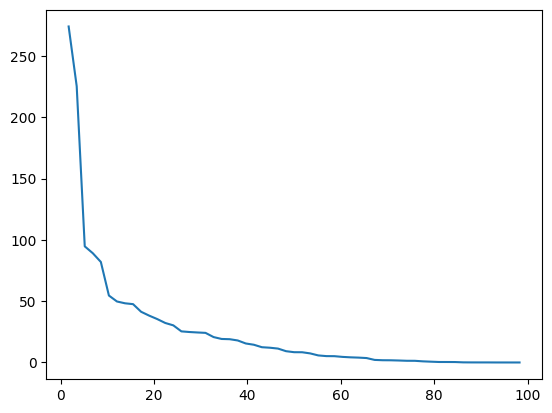

In [72]:
sn = np.arange(1,len(test_data)+1,1)
PP = [(sn[i]*100)/(len(sn)+1) for i in range(len(sn))]
data= np.dstack((np.array(PP), np.array(test_data)))
import seaborn as sns
sns.lineplot(x=PP, y=test_data)


In [74]:
data[0]

array([[1.72413793e+00, 2.74010000e+02],
       [3.44827586e+00, 2.25312000e+02],
       [5.17241379e+00, 9.47100000e+01],
       [6.89655172e+00, 8.91000000e+01],
       [8.62068966e+00, 8.19670000e+01],
       [1.03448276e+01, 5.45940000e+01],
       [1.20689655e+01, 4.97380000e+01],
       [1.37931034e+01, 4.82670000e+01],
       [1.55172414e+01, 4.75680000e+01],
       [1.72413793e+01, 4.13480000e+01],
       [1.89655172e+01, 3.82070000e+01],
       [2.06896552e+01, 3.54060000e+01],
       [2.24137931e+01, 3.22080000e+01],
       [2.41379310e+01, 3.02710000e+01],
       [2.58620690e+01, 2.53690000e+01],
       [2.75862069e+01, 2.48410000e+01],
       [2.93103448e+01, 2.44710000e+01],
       [3.10344828e+01, 2.41410000e+01],
       [3.27586207e+01, 2.07150000e+01],
       [3.44827586e+01, 1.91780000e+01],
       [3.62068966e+01, 1.89800000e+01],
       [3.79310345e+01, 1.79480000e+01],
       [3.96551724e+01, 1.54930000e+01],
       [4.13793103e+01, 1.44650000e+01],
       [4.310344

findfont: Font family 'default' not found.
findfont: Font family 'default' not found.
findfont: Font family 'default' not found.
findfont: Font family 'default' not found.
findfont: Font family 'default' not found.
findfont: Font family 'default' not found.
findfont: Font family 'default' not found.
findfont: Font family 'default' not found.
findfont: Font family 'default' not found.
findfont: Font family 'default' not found.
findfont: Font family 'default' not found.
findfont: Font family 'default' not found.
findfont: Font family 'default' not found.
findfont: Font family 'default' not found.
findfont: Font family 'default' not found.
findfont: Font family 'default' not found.
findfont: Font family 'default' not found.
findfont: Font family 'default' not found.
findfont: Font family 'default' not found.
findfont: Font family 'default' not found.
findfont: Font family 'default' not found.
findfont: Font family 'default' not found.
findfont: Font family 'default' not found.
findfont: F

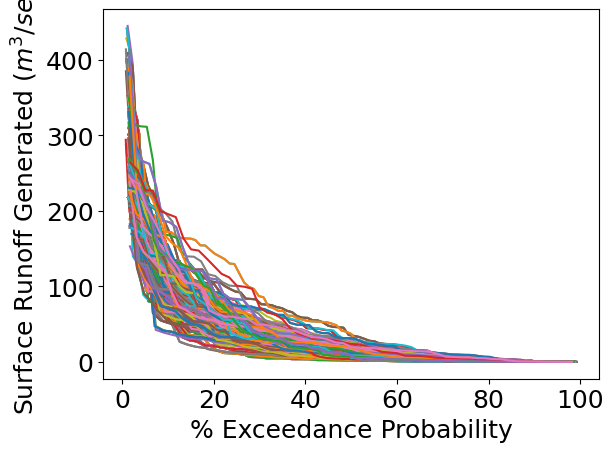

In [98]:
import matplotlib.pyplot as plt
import matplotlib

font = {'family' : 'default',
        'weight' : 'normal',
        'size'   : 18}
matplotlib.rc('font', **font)
for sb in subbasins[:]:
    test_data = hru_clipped.query(f'SUB=={sb}').iloc[:,-1].values
    test_data = list(set(test_data))
    test_data.sort(reverse=True)

    sn = np.arange(1,len(test_data)+1,1)
    PP = [(sn[i]*100)/(len(sn)+1) for i in range(len(sn))]

    data= np.dstack((PP, test_data))
    plt.plot(PP, test_data)
    # sns.relplot(x=PP, y = test_data, kind ='line')
plt.xlabel(r'% Exceedance Probability')
plt.ylabel(r'Surface Runoff Generated $(m^3/sec)$')
plt.savefig('flow duration curve.jpg', format = 'jpeg', dpi = 600)
plt.show()